In [1]:
#yolov8

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid11/yolov8_vid11.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v8_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object

In [2]:
#yolov5

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid11/yolov5-vid11.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v5_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [3]:
#yolov3

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid11/yolov3_vid11.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v3_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [4]:
#detectron

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid11/detectron_11.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_det_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_det_df)

           Object  Confidence
0        airplane    0.070783
1        backpack    0.085677
2           bench    0.122663
3         bicycle    0.129345
4            boat    0.077528
5            book    0.069596
6          bottle    0.075896
7            bowl    0.118224
8             bus    0.080344
9             car    0.977020
10     cell phone    0.184488
11          chair    0.090119
12            cup    0.055766
13   dining table    0.055382
14            dog    0.090805
15        handbag    0.090195
16          horse    0.058654
17     motorcycle    0.986154
18          mouse    0.052740
19         person    0.993167
20   potted plant    0.098882
21     skateboard    0.088290
22      stop sign    0.116965
23            tie    0.154226
24  traffic light    0.106850
25          truck    0.400873
26       umbrella    0.116424


In [6]:
#SSD

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid11/ssd_vid11.csv'
necessary_objects_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/classesForSSD.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame Number', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_ssd_df = unique_detections_df.groupby('Object')['Confidence Score'].mean().reset_index()

necessary_objects_df = pd.read_csv(necessary_objects_path)

filtered_mean_confidence_ssd_df = mean_confidence_ssd_df[mean_confidence_ssd_df['Object'].isin(necessary_objects_df['Objects'])]

In [7]:
import pandas as pd

df1 = mean_confidence_v8_df
df2 = mean_confidence_v5_df
df3 = mean_confidence_v3_df
df4 = filtered_mean_confidence_ssd_df
df5 = mean_confidence_det_df

# Identify unique objects across all dataframes
unique_objects = pd.unique(df1['Object'].tolist() + df2['Object'].tolist() + df3['Object'].tolist() +
                           df4['Object'].tolist() + df5['Object'].tolist())

# Create a new dataframe with unique objects
combined_df = pd.DataFrame(unique_objects, columns=['Object'])

# Merge the original dataframes with the new dataframe
combined_df = combined_df.merge(df1, on='Object', how='left').rename(columns={'Confidence': 'Confidence_1'})
combined_df = combined_df.merge(df2, on='Object', how='left').rename(columns={'Confidence': 'Confidence_2'})
combined_df = combined_df.merge(df3, on='Object', how='left').rename(columns={'Confidence': 'Confidence_3'})
combined_df = combined_df.merge(df4, on='Object', how='left').rename(columns={'Confidence Score': 'Confidence_4'})
combined_df = combined_df.merge(df5, on='Object', how='left').rename(columns={'Confidence': 'Confidence_5'})
combined_df = combined_df.fillna(0)

combined_df = combined_df[:12]
print(combined_df)
# Now combined_df has one column for objects and three columns for confidences

        Object  Confidence_1  Confidence_2  Confidence_3  Confidence_4  \
0          car      0.958776      0.947393      0.923720      0.643964   
1   motorcycle      0.874232      0.865204      0.859019      0.766771   
2       person      0.832699      0.814903      0.827243      0.664691   
3        truck      0.393278      0.412764      0.366321      0.371874   
4        chair      0.000000      0.320745      0.000000      0.342443   
5     backpack      0.000000      0.000000      0.000000      0.305602   
6        bench      0.000000      0.000000      0.000000      0.288516   
7      bicycle      0.000000      0.000000      0.000000      0.326308   
8         boat      0.000000      0.000000      0.000000      0.290644   
9       bottle      0.000000      0.000000      0.000000      0.275106   
10        bowl      0.000000      0.000000      0.000000      0.282178   
11         bus      0.000000      0.000000      0.000000      0.300394   

    Confidence_5  
0       0.977020  

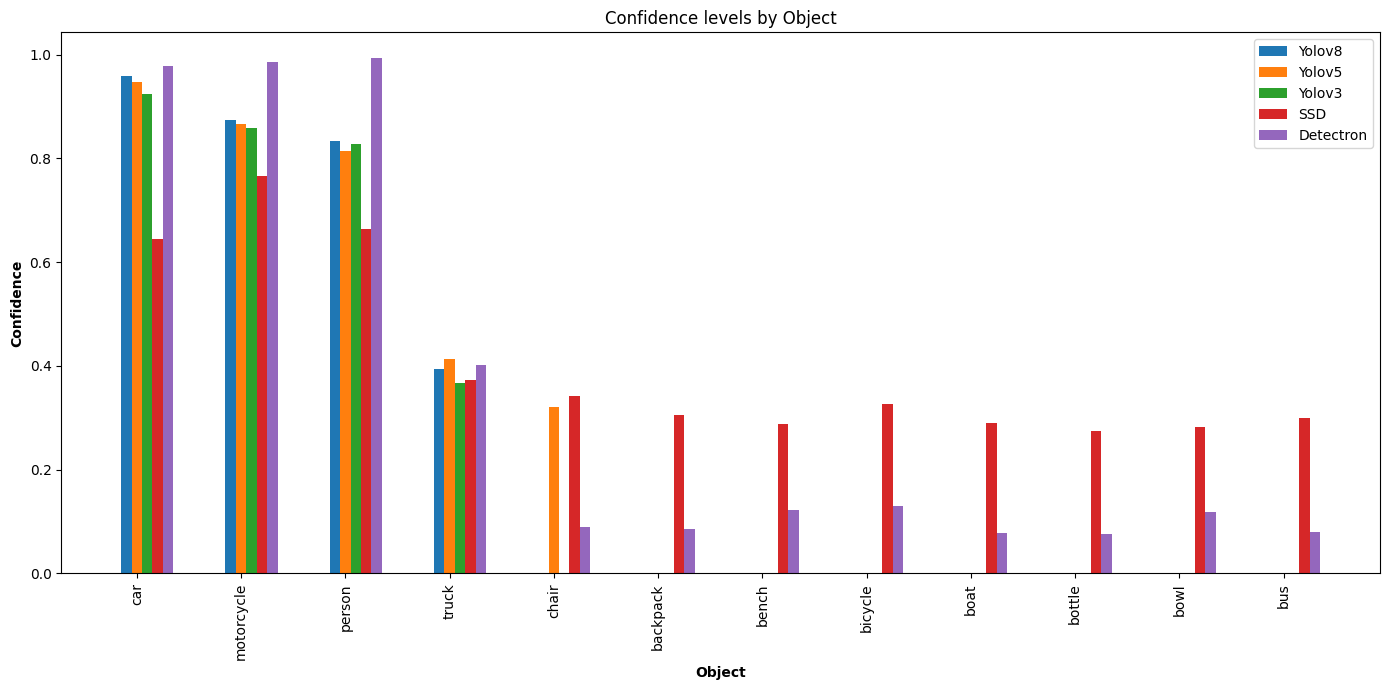

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Define the width of the bars
bar_width = 0.10

# Get the positions of the bars on the x-axis
index = np.arange(len(combined_df))

# Plotting the bars for each confidence
plt.bar(index, combined_df['Confidence_1'], width=bar_width, label='Yolov8')
plt.bar(index + bar_width, combined_df['Confidence_2'], width=bar_width, label='Yolov5')
plt.bar(index + 2*bar_width, combined_df['Confidence_3'], width=bar_width, label='Yolov3')
plt.bar(index + 3*bar_width, combined_df['Confidence_4'], width=bar_width, label='SSD')
plt.bar(index + 4*bar_width, combined_df['Confidence_5'], width=bar_width, label='Detectron')

# Add labels to the x-axis for each group of bars
plt.xlabel('Object', fontweight='bold')
plt.xticks(index + bar_width, combined_df['Object'], rotation=90)

# Add labels and title
plt.ylabel('Confidence', fontweight='bold')
plt.title('Confidence levels by Object')


# Create a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()